In [435]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [436]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [445]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [405]:
#preprocess the imgs
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255
#to normalize img to 0-1 range

#reshape the dimensions 28x28x1
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [406]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [407]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
#one-hot encoding of target variable

In [408]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add((Dropout(0.25)))

model.add(Dense(10, activation= 'softmax'))

In [409]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_4 (Dropout)         (None, 1600)             

In [410]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [411]:
x_train.shape

(60000, 28, 28, 1)

In [412]:
y_train.shape

(60000, 10)

In [413]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.1876 - accuracy: 0.9418 - val_loss: 0.0596 - val_accuracy: 0.9847
Epoch 2/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0659 - accuracy: 0.9798 - val_loss: 0.0424 - val_accuracy: 0.9887
Epoch 3/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0507 - accuracy: 0.9845 - val_loss: 0.0361 - val_accuracy: 0.9898
Epoch 4/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0356 - val_accuracy: 0.9907
Epoch 5/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0339 - accuracy: 0.9892 - val_loss: 0.0343 - val_accuracy: 0.9908
Epoch 6/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0341 - val_accuracy: 0.9905
Epoch 7/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0390 - val_ac

In [414]:
# model_save = keras.models.load_model("/Users/savanim/Desktop/HAII/")
model_save = model.save('my_model.h5')

In [387]:
loaded_model = keras.models.load_model('my_model.h5')

/Users/savanim/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(

In [388]:
score = loaded_model.evaluate(x_test, y_test)

print(f" The model Accuracy is {score[1]*100}")

ValueError: in user code:

    File "/Users/savanim/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/Users/savanim/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/savanim/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/Users/savanim/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 1919, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/savanim/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/Users/savanim/Library/Python/3.9/lib/python/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/savanim/Library/Python/3.9/lib/python/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/savanim/Library/Python/3.9/lib/python/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/savanim/Library/Python/3.9/lib/python/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/savanim/Library/Python/3.9/lib/python/site-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10, 2) and (None, 10) are incompatible


In [389]:
from keras.preprocessing import image

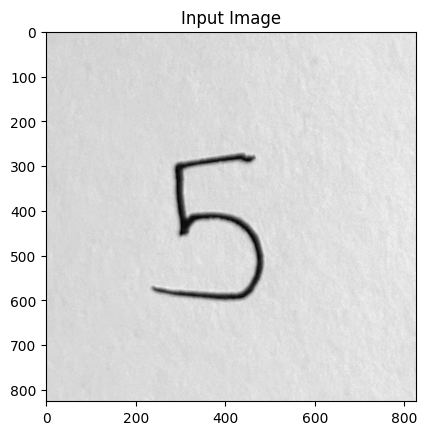

In [431]:
from PIL import Image
import numpy as np

# Load the image
image_path = '/Users/savanim/Desktop/HAII/uploads/5.jpeg'
# image_path = x_train[0]
img = Image.open(image_path).convert('L')  # Convert to grayscale
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.show()

img = image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to be between 0 and 1




In [433]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
print (prediction)

print(f"The predicted number is: {predicted_class}")


1/1 [==============================] - 0s 13ms/step
[[0.04158174 0.02125886 0.11622461 0.10542648 0.0112761  0.17214067
  0.07417475 0.04195963 0.36089647 0.05506073]]
The predicted number is: 8


8 pred = 2
4 pred = 0